## Первичный анализ данных

На этом занятии мы попробуем задачу регрессии. Данные возьмем вот эти - https://www.kaggle.com/budincsevity/szeged-weather

Открытые датасеты можно найти тут - https://archive.ics.uci.edu/ml/index.php или тут https://github.com/sebastianruder/NLP-progress (самих датасетов тут нет, но есть ссылки)

Также датасеты есть на kaggle (как соревновательные так и просто открытые).

Прежде, чем переходить к обучению моделей, нужно найти\собрать данные, загрузить их, почистить, удалить пропуски, предобработать, преобразовать в матрицы. Часто это занимает на порядок больше времени, чем само обучение, поэтому нужно сразу разобраться с всем этим в питоне.

Данные обычно хранятся в табличках (.csv, .tsv, .xls и т.д). Парсить их вручную не нужно, для этого есть библиотека pandas.

In [47]:
import pandas as pd

In [48]:
weather_hist = pd.read_csv('weatherHistory.csv')

Первым делом стоит посмотреть на размер датасета

In [49]:
weather_hist.shape
# (#строчек, #колонок)

(96453, 12)

Чтобы взглянуть на данные можно вывести несколько первых строчек.

In [50]:
weather_hist.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [51]:
## По умолчанию Pandas выводит всего 20 столбцов и 60 строк, 
## поэтому если ваш датафрейм больше, воспользуйтесь функцией set_option
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Посмотреть все колонки датасета можно вот так

In [52]:
weather_hist.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Пробелы и скобочки в названиях немного смущают. Давайте сделаем названия немного покороче. 

In [53]:
# можно переименовать колонки
weather_hist.rename({'Formatted Date':'date', 'Temperature (C)':'temp', 'Apparent Temperature (C)':'temp_app',
                    'Precip Type':'weather_type', 'Wind Speed (km/h)':'wind_speed', 'Humidity':'humidity',
                    'Daily Summary':'summary'}, 
                    axis=1, inplace=True)

In [54]:
# а можно создать новую колонку и присвоить ей значение старой, а затем отбросить старую
weather_hist['visibility'] = weather_hist['Visibility (km)']
weather_hist['wind_bearing'] = weather_hist['Wind Bearing (degrees)']
weather_hist['pressure'] = weather_hist['Pressure (millibars)']
weather_hist.drop(['Visibility (km)', 'Wind Bearing (degrees)', 'Pressure (millibars)'], axis=1, inplace=True)

In [55]:
weather_hist.head(5)

,date,Summary,weather_type,temp,temp_app,humidity,wind_speed,Loud Cover,summary,visibility,wind_bearing,pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,0.0,Partly cloudy throughout the day.,15.8263,251.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,0.0,Partly cloudy throughout the day.,15.8263,259.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,0.0,Partly cloudy throughout the day.,14.9569,204.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,0.0,Partly cloudy throughout the day.,15.8263,269.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,0.0,Partly cloudy throughout the day.,15.8263,259.0,1016.51


В 5 строчках, на которые мы посмотрели в колонке Loud Cover одни нули. Давайте проверим, не бесполезная ли это колонка.

In [56]:
# кроме нулей ничего нет
weather_hist['Loud Cover'].unique()

array([0.])

Отбросим эту колонку

In [57]:
weather_hist.drop(['Loud Cover'], axis=1, inplace=True)

Можно посчитать статистики для отдельных колонок

In [58]:
weather_hist['temp'].mean(), weather_hist['temp'].std()

(11.93267843751188, 9.551546320657026)

In [59]:
weather_hist['temp_app'].min(), weather_hist['temp_app'].max()

(-27.716666666666665, 39.344444444444434)

Есть удобная функция .describe(), которая собирает основные статистики для всех численных колонок.

In [60]:
weather_hist.describe()

,temp,temp_app,humidity,wind_speed,visibility,wind_bearing,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,10.347325,187.509232,1003.235956
std,9.551546,10.696847,0.195473,6.913571,4.192123,107.383428,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,8.339800,116.000000,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,10.046400,180.000000,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,14.812000,290.000000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,16.100000,359.000000,1046.380000


In [61]:
weather_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
date            96453 non-null object
Summary         96453 non-null object
weather_type    95936 non-null object
temp            96453 non-null float64
temp_app        96453 non-null float64
humidity        96453 non-null float64
wind_speed      96453 non-null float64
summary         96453 non-null object
visibility      96453 non-null float64
wind_bearing    96453 non-null float64
pressure        96453 non-null float64
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


Из этих статистик уже можно сделать какие-то выводы.  

1) видно, что в оставшихся данных нет пропусков.   
2) видно, что у колонок разные единицы измерения и соответствено значения разные (где-то от 0 до 1, где-то от -21 до 27)  
3) Temperature (C) и Apparent Temperature (C) очень похожи, но если посмотреть на Min и Max, то можно сделать вывод, что ощущаемая температура может отличаться только в меньшую сторону  

Чтобы посмотреть, как колонки связаны между собой, можно посчитать корреляцию.

In [62]:
# метод corr считает корреляцию всех колонок со всеми (острожнее, если у вас большой датасет)
weather_hist.corr()

,temp,temp_app,humidity,wind_speed,visibility,wind_bearing,pressure
temp,1.000000,0.992629,-0.632255,0.008957,0.392847,0.029988,-0.005447
temp_app,0.992629,1.000000,-0.602571,-0.056650,0.381718,0.029031,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,-0.369173,0.000735,0.005454
wind_speed,0.008957,-0.056650,-0.224951,1.000000,0.100749,0.103822,-0.049263
visibility,0.392847,0.381718,-0.369173,0.100749,1.000000,0.047594,0.059818
wind_bearing,0.029988,0.029031,0.000735,0.103822,0.047594,1.000000,-0.011651
pressure,-0.005447,-0.000219,0.005454,-0.049263,0.059818,-0.011651,1.000000


Для наглядности можно нарисовать тепловую карту.

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

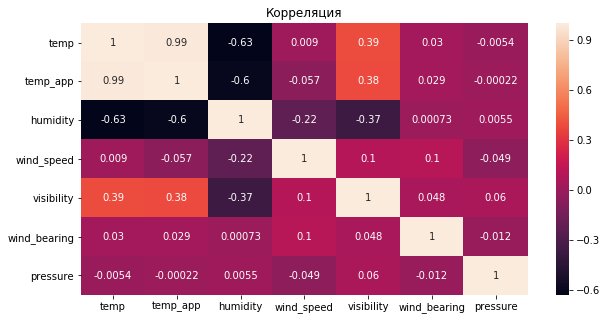

In [64]:

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=weather_hist.corr(), 
            annot=True, ax=ax)
plt.title("Корреляция")
plt.show()

Из тепловой карты можно сделать вывод, что 1) влажность негативно скоррелирована с температурой, а вот 2) скорость ветра с температурой почти никак не связана, хотя 3) связана, с влажностью. 4) Видимость связана с влажностью и с температурой. 

Ещё можно нарисовать ящик с усами для каждой из колонок, чтобы посмотреть, нет ли в данных выбросов:

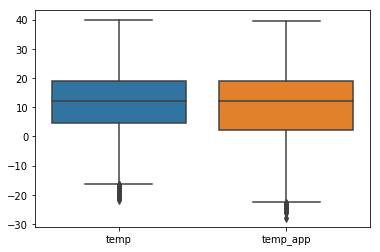

In [21]:
ax = sns.boxplot(data=weather_hist[['temp', 'temp_app']])

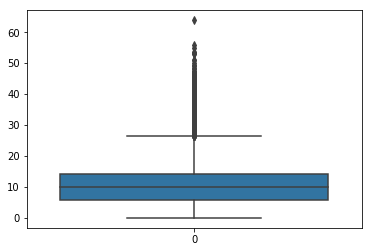

In [22]:
ax = sns.boxplot(data=weather_hist['wind_speed'])

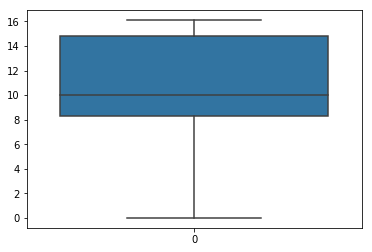

In [23]:
ax = sns.boxplot(data=weather_hist['visibility'])

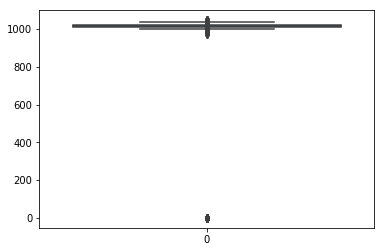

In [24]:
ax = sns.boxplot(data=weather_hist['pressure'])

Нулевым давление быть не может. Скорее всего это пропуск в данных. Посмотрим сколько таких 0.

In [25]:
weather_hist['pressure'].value_counts()

0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
1019.10     117
1016.70     117
1016.90     115
1015.90     114
1017.40     114
1016.50     114
1017.30     114
1018.70     112
1017.10     112
1017.60     111
1015.10     111
1014.90     110
1016.10     110
1017.90     109
1019.60     108
1016.80     108
1017.80     107
1014.50     106
1018.90     105
1020.20     105
1019.70     105
1017.20     104
1019.00     104
1016.30     104
1016.60     104
1015.70     104
1018.20     103
1015.50     102
1016.40     101
1017.50     101
1014.70     100
1014.40      98
1019.90      97
1018.80      96
1013.80      96
1018.10      96
1014.80      96
1013.50      95
1015.30      95
1018.40      95
1015.20      95
1014.60      94
1017.00      93
1018.60      93
1019.80      92
           ... 
1040.28       1
1044.35       1
1002.36       1
991.75        1
986.87        1
1044.60       1
996.57        1
1043.78       1
1000.29       1
994.77        1
987.06        1
994.52  

In [23]:
weather_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
date            96453 non-null object
Summary         96453 non-null object
weather_type    95936 non-null object
temp            96453 non-null float64
temp_app        96453 non-null float64
humidity        96453 non-null float64
wind_speed      96453 non-null float64
summary         96453 non-null object
visibility      96453 non-null float64
wind_bearing    96453 non-null float64
pressure        96453 non-null float64
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


С такими нулями можно поступить двумя способами - просто выкинуть или заменить на какое-то более реальное значение (например, усредненное давление).

In [24]:
weather_hist = weather_hist[weather_hist['pressure'] > 100]

In [45]:
weather_hist[weather_hist['pressure'] < 100]['pressure'] = weather_hist['pressure'].mean()

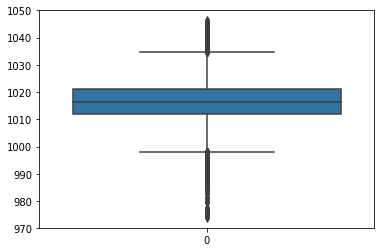

In [46]:
ax = sns.boxplot(data=weather_hist['pressure'])

Теперь давайте подключим категориальные переменные.

Можно сгруппировать данные по значениям rain и snow и посчитать те же статистики внутри этих групп.

In [66]:
weather_hist.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [67]:
weather_hist.groupby('Summary').agg(['mean'])

,temp,temp_app,humidity,wind_speed,visibility,wind_bearing,pressure
,mean,mean,mean,mean,mean,mean,mean
Summary,,,,,,,
Breezy,7.922016,3.387654,0.637778,32.143948,9.577115,233.018519,563.917593
Breezy and Dry,21.111111,21.111111,0.260000,33.810000,9.982000,240.000000,1021.600000
Breezy and Foggy,-0.510317,-7.403492,0.938571,33.477880,1.621960,160.628571,1008.934000
Breezy and Mostly Cloudy,11.093411,8.680588,0.637054,33.386345,11.478302,227.639535,1000.622984
Breezy and Overcast,7.241614,3.492235,0.763144,33.037566,11.067012,213.526515,1002.114924
Breezy and Partly Cloudy,12.492761,9.989349,0.545803,33.532796,11.326058,259.282383,996.398212
Clear,11.925109,11.040338,0.729708,8.141352,11.441788,179.180257,951.763532
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.490000,63.852600,11.447100,307.000000,1009.050000


## Домашнее задание 1
Проанализируйте данные и найдите самый холодный и самый ветренный дни в Сегеде за всю имеющуюся историю.

Узнайте сколько раз шел дождь летом 2014 года.

Сгруппируйтей данные по годам, месяцам и неделям (по отдельности) и найдите:

1) самый ветрянный месяц
2) самый влажный год
3) неделю с самой переменчивой погодой (там, где отклонение какого-то или нескольких признаков самое большое)

Для работы с датами вам пригодится [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

Ещё полезно будет пройтись по первому заниятию из [ml_course.ai](https://mlcourse.ai/) - https://habr.com/ru/company/ods/blog/322626/

## Регрессия в sklearn

Давайте теперь попробуем предсказывать какую-то из колонок. Для простоты оставим только численные колонки. 


In [68]:
# можно переопределить датасет его частью
weather_hist = weather_hist[['temp',
       'temp_app', 'humidity', 'wind_speed',
       'wind_bearing', 'visibility', 'pressure']]

Попробуем несколько базовых регрессоров в sklearn.

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR

Sklearn умееть работать и с dataframe из пандаса (если там только числа), но часто матрицу объекты-признаки и целевую переменную удобно вынести в отдельные переменные в виде numpy массива. 

In [70]:
X = weather_hist.drop('wind_speed', axis=1).values
y = weather_hist['wind_speed'].values

In [71]:
from sklearn.model_selection import train_test_split

Валидация (т.е. проверка качеста) моделей отдельная сложная тема, но главное правило простое - не оценивай качество модели на данных, на которых обучался. Просто отложенная тестовая выборка уже спасет от большинства проблем. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Ridge - это линейная регрессия с l2 регуляризацией. То есть строится модель, которая суммирует признаки с каким-то весами, чтобы получить предсказание. Веса подбираются во время обучения и на их значение накладывается ограничение (регуляризация), так чтобы они не получались слишком большими.

In [85]:
# силу регуляризации можно варьировать параметром alpha
regressor = Lasso(alpha=10)
regressor.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
list(zip(weather_hist.columns, regressor.coef_))

[('temp', 0.0),
 ('temp_app', -0.0),
 ('humidity', -0.0),
 ('wind_speed', 0.005622381164772534),
 ('wind_bearing', 0.0),
 ('visibility', -0.0021509345515767597)]

Чтобы оценить качество модели, предскажем значения целевой переменной на тестовой выборке и сравним с настоящими значениями.

In [76]:
preds = regressor.predict(X_test)

В качестве метрики будем использовать среднюю абсолютную ошибку. Она показывает отклонение от правильного ответа в тех же единах измерения.

In [77]:
from sklearn.metrics import mean_absolute_error

In [78]:
mean_absolute_error(y_test, preds)

4.119277729666935

Т.е. в среднем мы ошибаемся в скорости ветра на 4 км/ч

Попробуем другие алгоритмы.

Иногда бывает полезно стандартизировать данные (отнять среднее и поделить на стандартное отклонение). После стандартизации среднее всех колонок будет равно 0, а стандартное отклонение 1. Это позволяет исправить ситуацию, когда признаки представлены в разных единацах измерения. 
Для этого используется StandardScaler. 

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

До стандартизации:

In [40]:
list(X[0])

[9.472222222222221,
 7.388888888888887,
 0.89,
 251.0,
 15.826300000000002,
 1015.13]

После:

In [41]:
list(sc.fit_transform(X)[0])

[-0.2594808561597769,
 -0.3265377477383117,
 0.7926624413965685,
 0.591888531901622,
 1.3005175654507883,
 -0.2165173590801981]

In [42]:
regressor = Ridge()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

4.0498391481920475

In [43]:
regressor = Ridge(alpha=0.01)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

4.049473722959159

Lasso - линейная регрессия с l1 регуляризацией. Она немного медленее Ridge и обычно работает немного хуже, но она позволяет проводить отбор признаков.

In [44]:
regressor = Lasso(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

5.100549160777688

In [45]:
list(zip(weather_hist.columns, regressor.coef_))

[('temp', -0.0),
 ('temp_app', -0.0),
 ('humidity', -0.5172190895813394),
 ('wind_speed', 0.0),
 ('wind_bearing', 0.0),
 ('visibility', -0.7418107638971679)]

Такая модель использует для предсказания только влажность. В реальной задаче, нулевые признаки можно выбросить, для того, чтобы упросить модель (если качество устраивает конечно).

Попробуем SVM. Вообще SVM лучше подходит для классификации. Для регрессии в итоге получается такая же модель как и в линейной регрессии (прямая == взвешенная сумма признаков). Только подбор параметров тут происходит по-другому и поэтому результат может отличаться.

In [46]:
regressor = LinearSVR(C=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

3.9243397901552832

Качество даже немного улучшилось.

## Регрессия на тексте

При работе с текстом, как правило, приходится решать задачу классификации. Но бывают и случаи, где по тексту нужно предсказать число. Например, на Kaggle проводилось соревнование по прогнозированию вероятности покупки товара.   
Ссылка на соревнование - https://www.kaggle.com/c/avito-demand-prediction

Одним из признаков там было текстовое описание товара. 

Давайте выкинем все остальные признаки и попробуем только по тексту предсказать вероятность покупки. Алгоритмы тут можно использовать те же самые, но сами тексты нужны предварительно векторизовать.

Изначальный датасет достаточно большой, поэтому возьмем случайную подвыборку из него. (Я сделал это за вас. Если хотите поработать со всеми данными, скачайте их на сайте соревнования (только train.csv, иначе придется 123 гб скачивать) и раскомментируйте ячейки ниже)

In [137]:
# data = pd.read_csv('train.csv.zip')
# data.dropna(subset=['description'], inplace=True) # так выкидываются строчки с пропусками в колонке description

In [ ]:
data = data.sample(frac=0.08)

In [49]:
# data.to_csv('data.csv', index=None)

In [131]:
data = pd.read_csv('data.csv')

In [132]:
data.shape

(138715, 18)

In [136]:
data.head(5)

,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image_top_1,deal_probability
0,Бытовая электроника,Телефоны,Xiaomi,NaN,NaN,Xiaomi RedMI 4a,"Телефон новый, не использованный, в заводской ...",6900.0,22,2017-03-26,Private,2944.0,0.16933
1,Транспорт,Автомобили,С пробегом,Audi,Q5,"Audi Q5, 2009",Продам автомобиль AUDI SUV Stronic Quattro 2.0...,890000.0,6,2017-03-16,Private,1132.0,0.26029
2,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,98-104 см (2-4 года),Толстовка очень теплая,"на меху, очень теплая, хорошее состояние , бол...",500.0,123,2017-03-27,Private,61.0,0.80323
3,Бытовая электроника,Телефоны,iPhone,NaN,NaN,"Продаю айфон 6 16 гб сильвер с зарядкой,без ко...","Продаю айфон 6 16 гб сильвер с зарядкой,без ко...",23000.0,7,2017-03-15,Private,2918.0,0.03486
4,Животные,Аквариум,NaN,NaN,NaN,Аквариум,Аквариум для маленьких рыбок+корм+грунт+подста...,1000.0,109,2017-03-25,Company,1718.0,0.00000


Чтобы понимать, что наши модели делают что-то полезное, посчитаем качество для случайного предсказания и для предсказания средей вероятности.

В соревновании была другая метрика - RMSE. Её нет в sklearn, но её легко сделать из MSE и np.sqrt

Если хотите получше узнать о numpy, поделайте упражнения в этом репозитории - https://github.com/Kyubyong/numpy_exercises

In [93]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [94]:
y_train, y_test = train_test_split(data.deal_probability, random_state=42)

Cлучайное предсказание

In [95]:
np.random.rand(len(y_test))

array([0.93165905, 0.24946652, 0.96071886, ..., 0.74287804, 0.06574641,
       0.01829222])

In [98]:
np.sqrt(mean_squared_error(y_test, np.random.rand(len(y_test))))

0.5285613167194422

Среднее предсказание 

In [99]:
np.full(len(y_test), np.mean(y_train))

array([0.14566944, 0.14566944, 0.14566944, ..., 0.14566944, 0.14566944,
       0.14566944])

In [100]:
np.sqrt(mean_squared_error(y_test, np.full(len(y_test), np.mean(y_train))))

0.26367475849307315

Можно посчитать статистики по тексту и на этом обучить модель.

In [101]:
data['text_len'] = data['description'].apply(len)
data['text_len_tokens'] = data['description'].apply(lambda x: len(x.split()))
data['number_of_caps'] = data['description'].apply(lambda x: len([ch for ch in x if ch.isupper()]))
data['number_of_nonalphanum'] = data['description'].apply(lambda x: len([ch for ch in x if not ch.isalnum()]))

In [102]:
X = data[['text_len', 'text_len_tokens', 'number_of_caps', 'number_of_nonalphanum']].values
y = data.deal_probability.values

Проверим размер получившейся матрицы.

In [103]:
X.shape

(138715, 4)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [105]:
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.2633314826860365

Для векторизации можно использовать CountVectorizer или TfidfVectorizer. Они собирают словарь слов, которые используются в данных и с помощью него составляют вектора, в которых ненулевые значения показывают, что в конкретном тексте есть соответствующие слова из словаря.

В CountVectrizer значения - частоты слов в тексте, а в TfidfVectorizer - частоты, домноженные на idf.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [108]:
cv = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,2))
X = cv.fit_transform(data.description)
y = data.deal_probability.values

In [109]:
X.shape

(138715, 1000)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
regressor = Ridge(alpha=10)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.25122001490550927

In [112]:
cv = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4)
X = cv.fit_transform(data.description)
y = data.deal_probability.values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [118]:
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.24837284431865686

Когда данных много, то обычные модели в sklearn могут работать долго или занимать слишком много памяти. В этом случае может помочь SGDRegressor. Это та же линейная регрессия (или SVM если поменять loss), но обучающая на кусочках данных (батчах). Можно настроить количество проходов по датасету (max_iter) так, чтобы качество получалось достаточно хорошее, но времени на это уходило как можно меньше. 

In [115]:
from sklearn.linear_model import SGDRegressor

In [119]:
regressor = SGDRegressor(max_iter=10, alpha=0.00001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.25106011838562586

Можно попробовать объединить матрицы из CountVectorizer и TfidfVectorizer. Они возвращают sparse матрицы (т.е. там в основном нули), чтобы сэкономить память. Для конкатенации таких матриц в scipy есть функция hstack.

In [120]:
from scipy.sparse import hstack

In [121]:
cv = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,2))
tfidf = TfidfVectorizer(max_features=1000, min_df=5,analyzer='char', ngram_range=(3,3), max_df=0.4)

X_cv = cv.fit_transform(data.description)
X_tfidf = tfidf.fit_transform(data.description)

X = hstack([X_cv, X_tfidf])

In [122]:
X_cv.shape, X_tfidf.shape

((138715, 1000), (138715, 1000))

In [123]:
X.shape

(138715, 2000)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
regressor = SGDRegressor(max_iter=50, alpha=0.00001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.248087194219948

Для того, чтобы понять, насколько признаки объясняют целевую переменную, можно посчитать коэффициент детерминации. 

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_test, preds)

0.11473846322559045

Для точных совпадений он будет равен 1.

In [128]:
r2_score(y_test, y_test)

1.0

Но он может сильно ниже нуля, если модель совсем плохая.

In [129]:
# всегда предсказывает тысячу
r2_score(y_test, np.full(len(y_test), 1000))

-14379255.669139741

### Домашнее задание 2

Попробуйте придумать признаки (как минимум 5), которые можно извлечь из текста, помимо тех 4, которые мы уже использовали. Обучите модель на них и проверьте, улучашается ли качество. Опишите признаки, которое придумали и почему считаете, что они должны показывать вероятность покупки.

Побробуйте подобрать параметры векторизатора (TfidfVectorizer или CountVectorizer, или обоих) и параметры алгоритма так, чтобы качество, которое у нас получилось (0.248) улучшилось. Опишите то, что попробовали.
